## Observations and Insights 

<h1> Analysis on mice tested for each drug regimen </h1>
<h2> Observations</h2>
<li> The top 2 most frequently used drugs for mice testing are :
    <p style="text-indent:20px">1. Capomulin <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2. Ramicane </li>
 <li> The least frequently used drug for mice testing is: Propriva </li>
 <li> I used Pandas and Matplotlib for plotting the test results.
      <p style="text-indent:20px">The results that I found from both methods are matching.</li> 
      
<h1> Analysis on mice tested showing the Distribution of Female versus Male </h1>
<h2> Observations</h2>      
<li> The sample size of mice tested, based on Gender are almost even, with the Male mice edging out the Female by 1% approximately.</li>        
 <li> I used Pandas and Matplotlib for plotting the test results.
      <p style="text-indent:20px">The results that I found from both methods are matching.</li> 
         
<h1>The Final Tumor Volume of each mouse across four regimens of interest </h1>
<h2> Observations</h2>
<li> Ramicane showed best results in reducing the Tumor Size.
    <p style="text-indent:20px">Infubinol showed worst results in reducing the Tumor Size.</p></li>
<li> Infubinol box plot shows data collection is evenly distributed in the entire Quartile along the Median in the middle.
     <p style="text-indent:20px">Infubinol has an outlier data too.<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Both Capomulin and Ceftamin are skewed data.</li>     
     
<h1> Mouse i557´s tumor volume over time </h1>
<li> The mouse I chose for plotting a Line to show Tumor Volume change with respect to time is ,Mouse ID : i557 
     <p style="text-indent:20px">The Tumor volume decreased from 0 to 5 , but later started to climb back up after 5 timepoints. <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After 5 timepoints, the rate of Tumor Volume growth is consistently even.
         
<h1> Average Tumor volume vs. Mouse weight </h1>
<li> The most commonly used techniques for investigating the relationship between two quantitative variables are correlation and linear regression. Correlation quantifies the strength of the linear relationship between a pair of variables, whereas regression expresses the relationship in the form of an equation.</li>
<h2> Observations </h2>
<li> A scatter diagram of the data provides an initial check of the assumptions for regression. The assumptions can be assessed in more detail by looking at plots of the tumor volumes. The tumor volumes are plotted against the mouse weights. The relationship is linear and the variability is constant, because the tumor Volumes are evenly scattered along the range of mouse weights </li>
         

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_ct = len(combined_df["Mouse ID"].unique())
mice_ct

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_gp_dp = combined_df.reset_index().groupby(["Mouse ID","Timepoint"])[["index"]].count()
mice_gp_dp

index
Mouse ID Timepoint       
a203     0              1
         5              1
         10             1
         15             1
         20             1
...                   ...
z969     25             1
         30             1
         35             1
         40             1
         45             1

[1888 rows x 1 columns]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice = mice_gp_dp.loc[mice_gp_dp["index"]>1]
duplicate_mice

index
Mouse ID Timepoint       
g989     0              2
         5              2
         10             2
         15             2
         20             2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = combined_df.loc[combined_df["Mouse ID"]!="g989"]
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_ct = len(clean_mice_df["Mouse ID"].unique())
clean_mice_ct

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


mean_tv_dr = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tv_dr = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tv_dr = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev_tv_dr = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tv_dr = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

summary_statistics_df = pd.DataFrame({"Mean" : mean_tv_dr, "Median" : median_tv_dr, "Variance" : variance_tv_dr,
                                      "Standard Deviation" : std_dev_tv_dr, "standard error mean" : sem_tv_dr})
summary_statistics_df



,Mean,Median,Variance,Standard Deviation,standard error mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

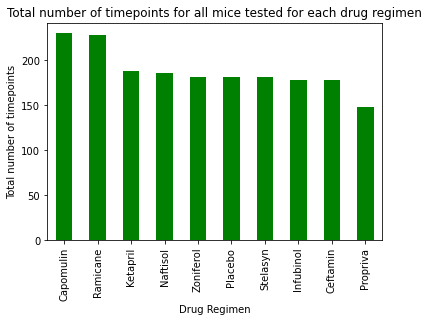

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_count = clean_mice_df["Drug Regimen"].value_counts()
# type(mice_count)

plot_pandas_bar = mice_count.plot.bar(color='g', title="Total number of timepoints for all mice tested for each drug regimen",
                                  xlabel = "Drug Regimen", ylabel = "Total number of timepoints")


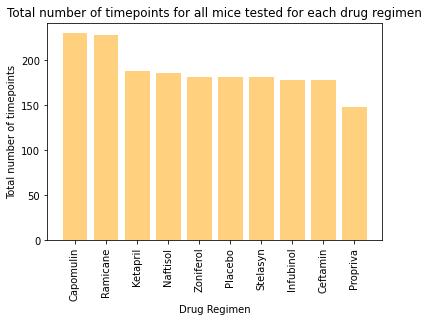

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mice_count = clean_mice_df["Drug Regimen"].value_counts()
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color='orange', alpha=0.5, align='center')

 
plt.title("Total number of timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of timepoints")
plt.xticks(rotation="vertical")
plt.show()


<h1> Analysis on mice tested for each drug regimen </h1>
<h2> Observations</h2>
<li> The top 2 most frequently used drugs for mice testing are :
    <p style="text-indent:20px">1. Capomulin <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2. Ramicane </li>
 <li> The least frequently used drug for mice testing is: Propriva </li>
 <li> I used Pandas and Matplotlib for plotting the test results.
      <p style="text-indent:20px">The results that I found from both methods are matching.</li> 

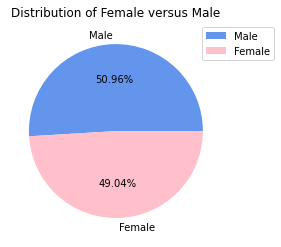

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dis = clean_mice_df["Sex"].value_counts()
gender_dis

plot_pandas_pie = gender_dis.plot(kind= "pie", colors=('cornflowerblue','pink'), title="Distribution of Female versus Male",
                                  ylabel = "", autopct='%1.2f%%', legend=True)
plot_pandas_pie.legend(loc = "upper right",bbox_to_anchor=(1.25, 1))



Male      958
Female    922
Name: Sex, dtype: int64

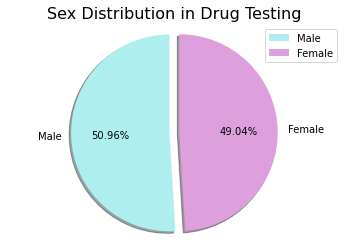

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_dis = clean_mice_df["Sex"].value_counts()
explode = (0,0.1)
colors =["paleturquoise", "plum"]
labels = list(gender_dis.index)
list(gender_dis.index)

plt.pie(gender_dis, explode=explode, labels=labels, colors = colors,
        autopct="%1.2f%%", shadow=True, startangle=90) 

plt.title("Sex Distribution in Drug Testing",fontsize=16)
plt.legend(labels, loc='upper right', frameon=True, bbox_to_anchor=(1, 1))
plt.axis("equal")
gender_dis


<h1> Analysis on mice tested showing the Distribution of Female versus Male </h1>
<h2> Observations</h2>
<li> The sample size of mice tested, based on Gender are almost even, with the Male mice edging out the Female by 1% approximately.</li>        
 <li> I used Pandas and Matplotlib for plotting the test results.
      <p style="text-indent:20px">The results that I found from both methods are matching.</li> 

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
Capomulin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin"]
Ramicane_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"]== "Ramicane", :]
Infubinol_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"]== "Infubinol", :]
Ceftamin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"]== "Ceftamin", :]
Capomulin_df
# Start by getting the last (greatest) timepoint for each mouse
a = clean_mice_df.groupby(["Mouse ID"])['Timepoint'].max()
type(a)
a

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tv_merged_df = pd.merge(a, clean_mice_df, on=(["Mouse ID","Timepoint"]))
tv_merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tum_vol_dt = []

# Locate the rows which contain mice on each drug and get the tumor volumes using for loop
for treatment in treatments:
    regimen_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == treatment]
    
    treatm = regimen_df.groupby(["Mouse ID"])['Timepoint'].max()
    tv_merged_df1 = pd.merge(treatm, regimen_df, on=(["Mouse ID","Timepoint"]))
     # add subset 
    tum_vol_dt.append(tv_merged_df1["Tumor Volume (mm3)"])
#     print(tum_vol_dt)

# type(a)
# regimen_df
# treatm
# tv_merged_df1
tum_vol_dt
# type(tum_vol_dt)
# len(tum_vol_dt )
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartile0 = tum_vol_dt[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tum_vol_dt[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tum_vol_dt[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tum_vol_dt[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3
    

    
# Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)


#Print values 
print(f"For {treatments[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")
print(f"For {treatments[1]} values below {lower_bound1} and above {upper_bound1} could be outliers")
print(f"For {treatments[2]} values below {lower_bound2} and above {upper_bound2} could be outliers")
print(f"For {treatments[3]} values below {lower_bound3} and above {upper_bound3} could be outliers")
    

For Capomulin values below 20.70456164999999 and above 51.83201549 could be outliers
For Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers
For Infubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers


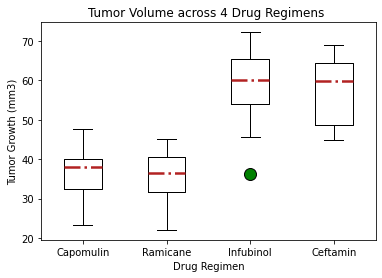

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

flierprops = dict(marker='o', markerfacecolor='green', markersize=12, linestyle='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume across 4 Drug Regimens ')
ax1.set_ylabel('Tumor Growth (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tum_vol_dt, flierprops = flierprops, medianprops=medianprops, labels = treatments)
plt.show()


<h1>The Final Tumor Volume of each mouse across four regimens of interest </h1>
<h2> Observations</h2>
<li> Ramicane showed best results in reducing the Tumor Size.
    <p style="text-indent:20px">Infubinol showed worst results in reducing the Tumor Size.</p></li>
<li> Infubinol box plot shows data collection is evenly distributed in the entire Quartile along the Median in the middle.
     <p style="text-indent:20px">Infubinol has an outlier data too.<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Both Capomulin and Ceftamin are skewed data.</li>
     

## Line and Scatter Plots

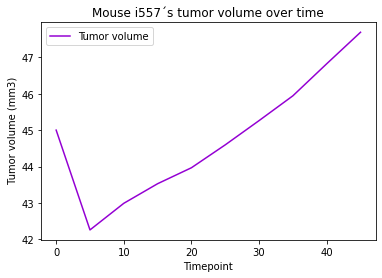

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

 
Capomulin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin"]
Capomulin_df.value_counts("Mouse ID")

# a mouse treated with Capomulin
mouse = "i557"
mouse_i557 = clean_mice_df.loc[clean_mice_df["Mouse ID"] == mouse]
mouse_i557

#Make variables to plot 
tumor_y = mouse_i557["Tumor Volume (mm3)"]
time_x = mouse_i557["Timepoint"]

# Plot our line that will be used to 
plt.plot(time_x, tumor_y, color="darkviolet", label="Tumor volume", linestyle = "solid")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

#Give titles and labels to graph
plt.title( "Mouse i557´s tumor volume over time")
plt.xlabel("Timepoint")
plt.xticks(np.arange(min(time_x), max(time_x)+1, 10))
plt.ylabel(" Tumor volume (mm3)")

# Print our chart to the screen
plt.show()


<h1> Mouse i557´s tumor volume over time </h1>
<li> The mouse I chose for plotting a Line to show Tumor Volume change with respect to time is ,Mouse ID : i557 
     <p style="text-indent:20px">The Tumor volume decreased from 0 to 5 , but later started to climb back up after 5 timepoints. <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After 5 timepoints, the rate of Tumor Volume growth is consistently even.

Text(0, 0.5, 'Tumor volume (mm3)')

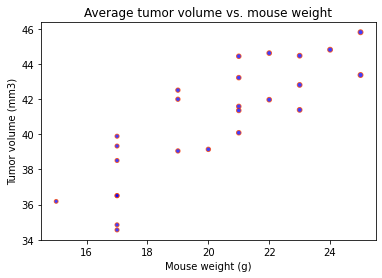

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#All capomulin mice are in Capomulin_df
Capomulin_df.head()
cap_group =Capomulin_df.groupby(["Mouse ID"]).mean()
cap_group

#Get average tumor volume
avg_tumor_vol = cap_group["Weight (g)"]
avg_weight = cap_group["Tumor Volume (mm3)"]

#Create scatterplot 
plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="blue", edgecolors="orangered",
            s=avg_tumor_vol, alpha=0.75)
#Add title and labels to scatter plot 
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")

## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708723
y = 0.95x + 21.55


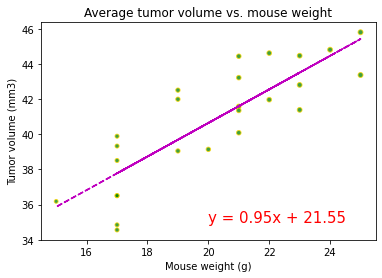

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Equations for correlation and regression
correlation = st.pearsonr(avg_tumor_vol,avg_weight)
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_vol, avg_weight)
regress_values = avg_tumor_vol * slope + intercept

#Use the same scatterplot made before 
#Change colors 
plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="green", edgecolors="gold",
            s=avg_tumor_vol, alpha=0.75)
plt.plot(avg_tumor_vol,regress_values,"m--")


#Add title and labels to scatter plot 
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

<h1> Average Tumor volume vs. Mouse weight </h1>
<li> The most commonly used techniques for investigating the relationship between two quantitative variables are correlation and linear regression. Correlation quantifies the strength of the linear relationship between a pair of variables, whereas regression expresses the relationship in the form of an equation.</li>
<h2> Observations </h2>
<li> A scatter diagram of the data provides an initial check of the assumptions for regression. The assumptions can be assessed in more detail by looking at plots of the tumor volumes. The tumor volumes are plotted against the mouse weights. The relationship is linear and the variability is constant, because the tumor Volumes are evenly scattered along the range of mouse weights </li>
    